
# Как пользоваться Google Colab / Jupyter Notebook

1. Чтобы выполнить код в ячейке выше, выберите ее, а затем нажмите кнопку воспроизведения слева от кода или используйте сочетание клавиш Cmd/Ctrl + Ввод. Либо нажмите на треугольник Play рядом с ячейкой.
2. Ячейки выполняются в порядке запуске, номер запуска пишется в квадратных скобках слева, например [2]
3. Чтобы изменить код, достаточно нажать на ячейку.
4. Переменные, заданные в одной ячейке, можно будет использовать в других ячейках.
5. Также каждая ячейка выводит результат последней строки.
6. У colab-ноутбуков есть права доступов (как у google docs, например). Когда делитесь ссылкой не забывайте выставить настройки доступа (верхний правый угол – Share)

Кто еще не пользовался colab, обязательно прочитайте: https://colab.research.google.com/notebooks/welcome.ipynb?hl=ru 

## Что нужно делать в этом ноутбуке

В местах помеченных комментарием *# Ваш код здесь* вам нужно написать код так, чтобы всё работало правильно.

## Установка и импорт библиотек

В начале установим и импортируем все библиотеки. В Colab бОльшая часть необходимых уже поставлена, если нужно что то поставить это можно сделать используя команду *!pip install package_name*, ее можно исполнить прямо в ячейке.

Все импорты обычно выносят наверх в первую ячейку, чтобы при перезапуске можно было импортнуть единожды, а по ячейкам начать двигаться с какой-то середины (например у вас там независимая вторая часть задания)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

# Как работают алгоритмы

## Алгоритм кластеризации K-means

Алгоритм k-means применяется для задачи кластеризации. Напомню его основные шаги. Пусть у нас имеется N точек на плоскости ${(x_1,y_1),...,(x_N,y_N)}$
Допустим мы хотим разбить их на k=3 кластера.
1. Выбираем k=3 случайные точки из этого множества. Говорим, что они являются теперь центрами наших кластеров.
2. Для каждой из оставшихся точек смотрим, к какому из центров она ближе и определяем её в этот кластер.
3. У нас получилось разбить точки на 3 кластера. Естественно это не оптимальное разбиение. Найдём новые центры кластеров. Например, если точки ${(x_{i_1}, y_{i_1}),...,(x_{i_n}, y_{i_n})}$ попали в один кластер, то их новый центр будет имеет координаты:
$$x_M=\frac{x_{i_1}+...+x_{i_n}}{n}$$
$$y_M=\frac{y_{i_1}+...+y_{i_n}}{n}$$
4. Переходим к шагу 2 и продолжаем до тех пор, пока кластеры не перестанут меняться.

### Подготовка датасета
Сгенерируем 3 кластера случайных точек, в каждом кластере по 20 точек.
Для этого зафиксируем центры кластеров. Будем генерировать рандомные точки с заданным отклонением вокруг них.

In [ ]:
points = []

num_clusters = 3
cluster_size = 20

means_x = [1., 1.2, 0.8]
means_y = [0.5, 0.6, 0.5]
std = 0.1

for k in range(num_clusters):
    for i in range(cluster_size):
        x_i = np.random.normal(loc=means_x[k], scale=std)
        y_i = np.random.normal(loc=means_y[k], scale=std)
        points.append((x_i, y_i))

Мы генерировали по 20 точек вокруг центра и складывали их последовательно, нарисуем, как выглядят наши кластера сейчас тремя цветами.

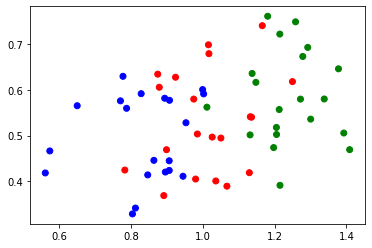

In [ ]:
points_x = list(map(lambda x: x[0], points))
points_y = list(map(lambda x: x[1], points))
colors = ['r'] * cluster_size + ['g'] * cluster_size + ['b'] * cluster_size
plt.scatter(x=points_x, y=points_y, c=colors)

### Код алгоритма 
Здесь вам нужно реализовать несколько частей

In [ ]:
def k_means(points, num_clusters):
    """
    @param points: список из пар координат точек
    @param num_clusters: число кластеров, на которое необходимо поделить

    @return: номера кластеров и их центры
    """
    def print_clusters(n_iteration, points, result=None, centers=None):
      print(f"Итерация №{n_iteration}")
      points_x = list(map(lambda x: x[0], points))
      points_y = list(map(lambda x: x[1], points))
      plt.scatter(x=points_x, y=points_y, c=result)
      if centers:
        centers_x = list(map(lambda x: x[0], centers))
        centers_y = list(map(lambda x: x[1], centers))
        plt.scatter(x=centers_x, y=centers_y, marker='x')
      plt.show()
    
    num_points = len(points)
    centers = points[:num_clusters] # Выбираем начальные центры кластеров (просто первые num_clusters точек)
    result = [-1] * num_points # В качестве результата будет массив с номерами кластеров для каждой точки
    prev_result = None # Предыдущая копия массива result, чтобы сравнивать, поменялось что-то или нет
    
    print_clusters(0, points, centers=centers) # Выведем на экран стартовую ситуацию
    
    n_iteration = 1
    # Работаем до тех пор, пока кластеры не перестанут меняться
    while result != prev_result:
      prev_result = list(result)
      # Определяем каждую точку к кластеру
      # Ваш код здесь
      for j, (x, y) in enumerate(points):
          cluster = -1
          min_dist = np.inf
          for i, (center_x, center_y) in enumerate(centers):
              dist = ((center_x - x) ** 2 + (center_y - y) ** 2) ** 0.5
              if dist < min_dist:
                  cluster = i
                  min_dist = dist
          result[j] = cluster    
        
        # Меняем центры кластеров
        # Ваш код здесь
      for i in range(num_clusters):
          new_center_x = 0.
          new_center_y = 0.
          num_elems = 0
          for j in range(len(points)):
            if result[j] == i:
              new_center_x += points[j][0]
              new_center_y += points[j][1]
              num_elems += 1
          centers[i] = (new_center_x / num_elems, new_center_y / num_elems)
            
      print_clusters(n_iteration, points, result, centers) # Выведем то, что у нас получилось
      n_iteration += 1
    return result, centers    

Выведем полученный результат

Итерация №0


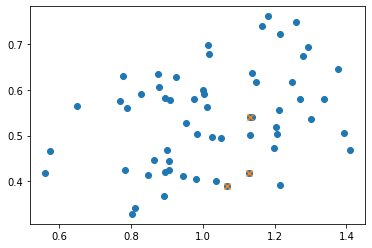

Итерация №1


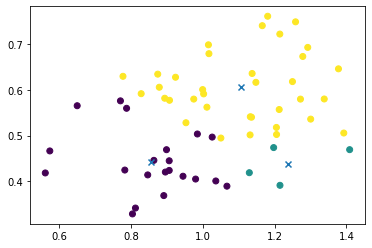

Итерация №2


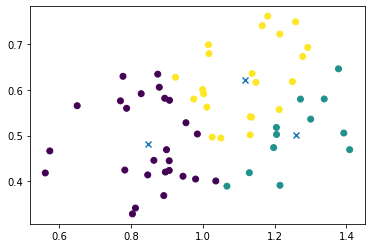

Итерация №3


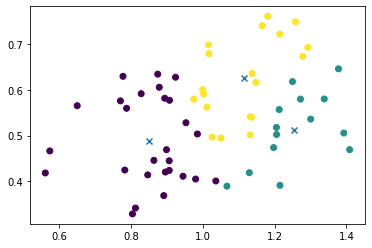

Итерация №4


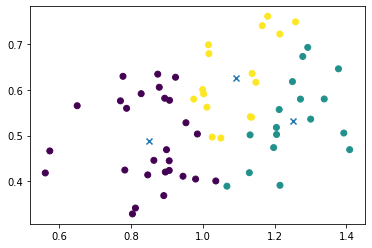

Итерация №5


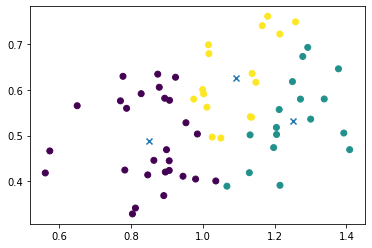

In [ ]:
res, centers = k_means(points, 3)

Сравним с тем как было при генерации

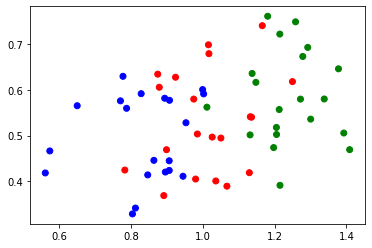

In [ ]:
points_x = list(map(lambda x: x[0], points))
points_y = list(map(lambda x: x[1], points))
colors = ['r'] * cluster_size + ['g'] * cluster_size + ['b'] * cluster_size
plt.scatter(x=points_x, y=points_y, c=colors)

In [ ]:
print("Истинные центры кластеров:")
for i in range(num_clusters):
    print("({0:.1f}, {1:.1f})".format(means_x[i], means_y[i]))

print("Полученные центры кластеров. Порядок может поменяться, а значения могут немного отличаться:")
for i in range(num_clusters):
    print("({0:.1f}, {1:.1f})".format(centers[i][0], centers[i][1]))

Истинные центры кластеров:
(1.0, 0.5)
(1.2, 0.6)
(0.8, 0.5)
Полученные центры кластеров. Порядок может поменяться, а значения могут немного отличаться:
(0.8, 0.5)
(1.3, 0.5)
(1.1, 0.6)


### Посмотрим как кластеризует k-means из sklearn

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(points)

In [ ]:
kmeans.cluster_centers_

array([[1.23713798, 0.58942433],
       [0.96294531, 0.51392989],
       [0.74507457, 0.4833269 ]])

Вот как выглядят кластера полученные в kmeans

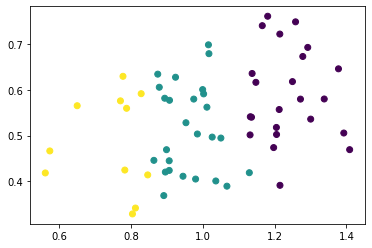

In [ ]:
points_x = list(map(lambda x: x[0], points))
points_y = list(map(lambda x: x[1], points))
plt.scatter(x=points_x, y=points_y, c=kmeans.labels_)
plt.show()

А вот какие были у нас кластера (как мы их построили).

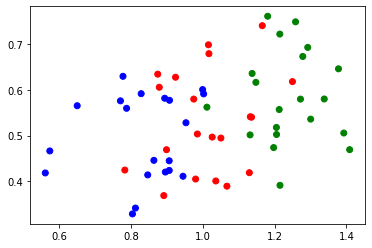

In [ ]:
colors = ['r'] * cluster_size + ['g'] * cluster_size + ['b'] * cluster_size
plt.scatter(x=points_x, y=points_y, c=colors)

## Алгоритм классификации kNN

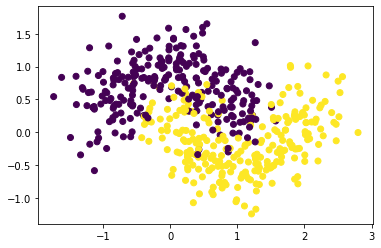

In [ ]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)

Для того,  чтобы проверять модель нам нужна отложенная (тестовая) выборка с известными ответами. Для этого используют функцию train_test_split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. Инициализируем классификатор из sklearn
2. Обучаем на трейне (fit)
3. Предсказываем на тесте





In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Хочется оценить насколько наш алгоритм хорошо предсказывает, для этого используют метрики.

Accuracy (точность) - доля правильных ответов алгоритма.

In [ ]:
 accuracy_score(y_test, y_pred)

0.89

Посмотрим, где у нас не совпали предсказания с ответами

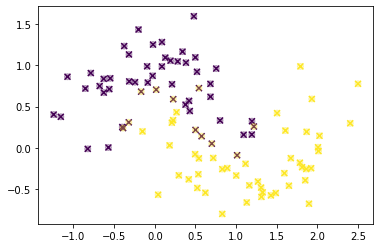

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='x')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', alpha=0.3)